# **Data Quality Check**

I performed checks for data constraints, such as identifying any missing or invalid values, ensuring numerical and categorical constraints are met. Additionally, I assessed uniqueness to identify any duplicate records and examined data uniformity to ensure consistent formatting and values across the dataset. This thorough analysis provides insights into the overall quality and integrity of the data, enabling informed decision-making and reliable analysis.

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import datetime

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [86]:
data = pd.ExcelFile("/content/sample_data/KPMG_VI_New_raw_data_update_final.xlsx")

In [87]:
Transactions = pd.read_excel(data, 'Transactions')
NewCustomerList = pd.read_excel(data, 'NewCustomerList')
CustomerDemographic = pd.read_excel(data, 'CustomerDemographic')
CustomerAddress = pd.read_excel(data, 'CustomerAddress')

## **Transactions Quality Check**

In [88]:
Transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [89]:
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [90]:
Transactions.shape

(20000, 13)

In [91]:
Transactions.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [92]:
Transactions.duplicated().sum()

0

In [93]:
Transactions.nunique() 

transaction_id             20000
product_id                   101
customer_id                 3494
transaction_date             364
online_order                   2
order_status                   2
brand                          6
product_line                   4
product_class                  3
product_size                   3
list_price                   296
standard_cost                103
product_first_sold_date      100
dtype: int64

In [94]:
Transactions.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object')

In [95]:
Transactions['order_status'].value_counts()

Approved     19821
Cancelled      179
Name: order_status, dtype: int64

In [96]:
Transactions['brand'].value_counts()

Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: brand, dtype: int64

In [97]:
Transactions['product_line'].value_counts()

Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64

In [98]:
Transactions['product_class'].value_counts()

medium    13826
high       3013
low        2964
Name: product_class, dtype: int64

In [99]:
Transactions['product_size'].value_counts()

medium    12990
large      3976
small      2837
Name: product_size, dtype: int64

In [100]:
Transactions['product_first_sold_date']

0        41245.0
1        41701.0
2        36361.0
3        36145.0
4        42226.0
          ...   
19995    37823.0
19996    35560.0
19997    40410.0
19998    38216.0
19999    36334.0
Name: product_first_sold_date, Length: 20000, dtype: float64

In [101]:
Transactions['product_first_sold_date'] = pd.to_datetime(Transactions['product_first_sold_date'], unit='s')
Transactions['product_first_sold_date'].head()

0   1970-01-01 11:27:25
1   1970-01-01 11:35:01
2   1970-01-01 10:06:01
3   1970-01-01 10:02:25
4   1970-01-01 11:43:46
Name: product_first_sold_date, dtype: datetime64[ns]

In [102]:
Transactions['product_first_sold_date'].head()

0   1970-01-01 11:27:25
1   1970-01-01 11:35:01
2   1970-01-01 10:06:01
3   1970-01-01 10:02:25
4   1970-01-01 11:43:46
Name: product_first_sold_date, dtype: datetime64[ns]

**There are missing values in 7 columns. Also, the date at which product first sold is inaccurate. Missing values can eitger be dropped or trated through sanity check while datetime issue needs to be corrected.**

## **Exploring New Customer List**

In [103]:
NewCustomerList.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.73,0.9125,1.140625,0.969531,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.56,0.5600,0.700000,0.595000,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.75,0.7500,0.750000,0.750000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.80,1.0000,1.000000,1.000000,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.58,0.5800,0.725000,0.725000,4,4,1.703125


In [104]:
NewCustomerList.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [105]:
NewCustomerList.shape

(1000, 23)

In [106]:
NewCustomerList.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Unnamed: 16                              0
Unnamed: 17                              0
Unnamed: 18                              0
Unnamed: 19                              0
Unnamed: 20                              0
Rank                                     0
Value                                    0
dtype: int6

In [107]:
NewCustomerList.duplicated().sum()

0

In [108]:
NewCustomerList.nunique()

first_name                              940
last_name                               961
gender                                    3
past_3_years_bike_related_purchases     100
DOB                                     958
job_title                               184
job_industry_category                     9
wealth_segment                            3
deceased_indicator                        1
owns_car                                  2
tenure                                   23
address                                1000
postcode                                522
state                                     3
country                                   1
property_valuation                       12
Unnamed: 16                              71
Unnamed: 17                             131
Unnamed: 18                             183
Unnamed: 19                             327
Unnamed: 20                             324
Rank                                    324
Value                           

In [109]:
NewCustomerList.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Rank', 'Value'],
      dtype='object')

In [110]:
NewCustomerList['gender'].value_counts()

Female    513
Male      470
U          17
Name: gender, dtype: int64

In [111]:
NewCustomerList[NewCustomerList.gender == "U"]

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
59,Normy,Goodinge,U,5,NaT,Associate Professor,IT,Mass Customer,N,No,...,VIC,Australia,5,0.58,0.5800,0.580000,0.493000,57,57,1.375000
226,Hatti,Carletti,U,35,NaT,Legal Assistant,IT,Affluent Customer,N,Yes,...,NSW,Australia,9,0.92,1.1500,1.437500,1.437500,226,226,1.112500
324,Rozamond,Turtle,U,69,NaT,Legal Assistant,IT,Mass Customer,N,Yes,...,VIC,Australia,3,1.00,1.2500,1.250000,1.062500,324,324,1.010000
358,Tamas,Swatman,U,65,NaT,Assistant Media Planner,Entertainment,Affluent Customer,N,No,...,QLD,Australia,8,1.04,1.0400,1.040000,1.040000,358,358,0.980000
360,Tracy,Andrejevic,U,71,NaT,Programmer II,IT,Mass Customer,N,Yes,...,VIC,Australia,7,0.53,0.6625,0.662500,0.563125,361,361,0.977500
374,Agneta,McAmish,U,66,NaT,Structural Analysis Engineer,IT,Mass Customer,N,No,...,QLD,Australia,6,0.43,0.4300,0.430000,0.365500,375,375,0.960000
434,Gregg,Aimeric,U,52,NaT,Internal Auditor,IT,Mass Customer,N,No,...,VIC,Australia,5,0.67,0.6700,0.670000,0.569500,433,433,0.906250
439,Johna,Bunker,U,93,NaT,Tax Accountant,IT,Mass Customer,N,Yes,...,VIC,Australia,6,0.55,0.6875,0.859375,0.730469,436,436,0.903125
574,Harlene,Nono,U,69,NaT,Human Resources Manager,IT,Mass Customer,N,No,...,NSW,Australia,7,1.00,1.0000,1.000000,0.850000,575,575,0.796875
598,Gerianne,Kaysor,U,15,NaT,Project Manager,IT,Affluent Customer,N,No,...,NSW,Australia,11,0.46,0.4600,0.575000,0.575000,599,599,0.775000


 **Missing Values**

In [112]:
NewCustomerList['DOB'].value_counts()

1998-02-05    2
1978-01-15    2
1977-11-08    2
1951-11-28    2
1979-07-28    2
             ..
1945-08-08    1
1943-08-27    1
1999-10-24    1
1976-01-24    1
1955-10-02    1
Name: DOB, Length: 958, dtype: int64

In [113]:
NewCustomerList['job_industry_category'].value_counts()

Financial Services    203
Manufacturing         199
Health                152
Retail                 78
Property               64
IT                     51
Entertainment          37
Argiculture            26
Telecommunications     25
Name: job_industry_category, dtype: int64

In [114]:
NewCustomerList['wealth_segment'].value_counts()

Mass Customer        508
High Net Worth       251
Affluent Customer    241
Name: wealth_segment, dtype: int64

In [115]:
NewCustomerList['state'].value_counts()

NSW    506
VIC    266
QLD    228
Name: state, dtype: int64

In [116]:
NewCustomerList['owns_car'].value_counts()

No     507
Yes    493
Name: owns_car, dtype: int64

In [117]:
NewCustomerList['deceased_indicator'].value_counts()

N    1000
Name: deceased_indicator, dtype: int64

In [118]:
NewCustomerList = NewCustomerList.drop(['Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20'], axis=1)

**There are missing values in 4 columns and data inconsistency in gender column as 17 entries are writen under "U" gender. Missing values can either be dropped or corrected and gender values can also be treated according to dataset.**

## **Exploring Customer Demographics**

In [119]:
CustomerDemographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [120]:
CustomerDemographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

**Missing Values**

In [121]:
CustomerDemographic.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [122]:
CustomerDemographic.duplicated().sum()

0

In [123]:
CustomerDemographic.nunique()

customer_id                            4000
first_name                             3139
last_name                              3725
gender                                    6
past_3_years_bike_related_purchases     100
DOB                                    3448
job_title                               195
job_industry_category                     9
wealth_segment                            3
deceased_indicator                        2
default                                  90
owns_car                                  2
tenure                                   22
dtype: int64

In [124]:
CustomerDemographic.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure'],
      dtype='object')

**Creating data consistency by replacing inconsistent entries.**

In [125]:
CustomerDemographic['gender'].value_counts()

Female    2037
Male      1872
U           88
F            1
Femal        1
M            1
Name: gender, dtype: int64

In [126]:
CustomerDemographic['gender'] = CustomerDemographic['gender'].replace('F','Female').replace('M','Male').replace('Femal','Female').replace('U','Unspecified')

In [127]:
CustomerDemographic['gender'].value_counts()

Female         2039
Male           1873
Unspecified      88
Name: gender, dtype: int64

In [128]:
CustomerDemographic['past_3_years_bike_related_purchases'].value_counts()

16    56
19    56
67    54
20    54
2     50
      ..
8     28
95    27
85    27
86    27
92    24
Name: past_3_years_bike_related_purchases, Length: 100, dtype: int64

In [129]:
CustomerDemographic['DOB'].value_counts()

1978-01-30    7
1964-07-08    4
1962-12-17    4
1978-08-19    4
1977-05-13    4
             ..
1989-06-16    1
1998-09-30    1
1985-03-11    1
1989-10-23    1
1991-11-05    1
Name: DOB, Length: 3448, dtype: int64

In [130]:
CustomerDemographic['job_title'].value_counts()

Business Systems Development Analyst    45
Tax Accountant                          44
Social Worker                           44
Internal Auditor                        42
Recruiting Manager                      41
                                        ..
Database Administrator I                 4
Health Coach I                           3
Health Coach III                         3
Research Assistant III                   3
Developer I                              1
Name: job_title, Length: 195, dtype: int64

In [131]:
CustomerDemographic['job_industry_category'].value_counts()

Manufacturing         799
Financial Services    774
Health                602
Retail                358
Property              267
IT                    223
Entertainment         136
Argiculture           113
Telecommunications     72
Name: job_industry_category, dtype: int64

In [132]:
CustomerDemographic['wealth_segment'].value_counts()

Mass Customer        2000
High Net Worth       1021
Affluent Customer     979
Name: wealth_segment, dtype: int64

In [133]:
CustomerDemographic['deceased_indicator'].value_counts()

N    3998
Y       2
Name: deceased_indicator, dtype: int64

In [134]:
CustomerDemographic['default'].value_counts()

100                                       113
1                                         112
-1                                        111
-100                                       99
Ù¡Ù¢Ù£                                     53
                                         ... 
testâ testâ«                               31
/dev/null; touch /tmp/blns.fail ; echo     30
âªâªtestâª                                 29
ì¸ëë°í ë¥´                                 27
,ãã»:*:ã»ãâ( â» Ï â» )ãã»:*:ã»ãâ           25
Name: default, Length: 90, dtype: int64

**Dropping Useless Column**

In [135]:
CustomerDemographic = CustomerDemographic.drop('default', axis=1)

In [136]:
CustomerDemographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0


In [137]:
CustomerDemographic['owns_car'].value_counts()

Yes    2024
No     1976
Name: owns_car, dtype: int64

In [138]:
CustomerDemographic['tenure'].value_counts()

7.0     235
5.0     228
11.0    221
10.0    218
16.0    215
8.0     211
18.0    208
12.0    202
9.0     200
14.0    200
6.0     192
13.0    191
4.0     191
17.0    182
15.0    179
1.0     166
3.0     160
19.0    159
2.0     150
20.0     96
22.0     55
21.0     54
Name: tenure, dtype: int64

**There're missing values in 6 columns and inconsistency of data entry in gender column. They must be either corrected or removed for better analysis**

## **Exploring Customer Address Data Set**

In [139]:
CustomerAddress.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [140]:
CustomerAddress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [141]:
CustomerAddress.isnull().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [142]:
CustomerAddress.duplicated().sum()

0

In [143]:
CustomerAddress.nunique()

customer_id           3999
address               3996
postcode               873
state                    5
country                  1
property_valuation      12
dtype: int64

In [144]:
CustomerAddress['postcode'].value_counts()

2170    31
2155    30
2145    30
2153    29
3977    26
        ..
3808     1
3114     1
4721     1
4799     1
3089     1
Name: postcode, Length: 873, dtype: int64

In [145]:
CustomerAddress['state'].value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

In [146]:
CustomerAddress['country'].value_counts()

Australia    3999
Name: country, dtype: int64

In [147]:
CustomerAddress['property_valuation'].value_counts()

9     647
8     646
10    577
7     493
11    281
6     238
5     225
4     214
12    195
3     186
1     154
2     143
Name: property_valuation, dtype: int64

**Here data is consistent and Uniform without any missing values**

# **2. Data Modelling**

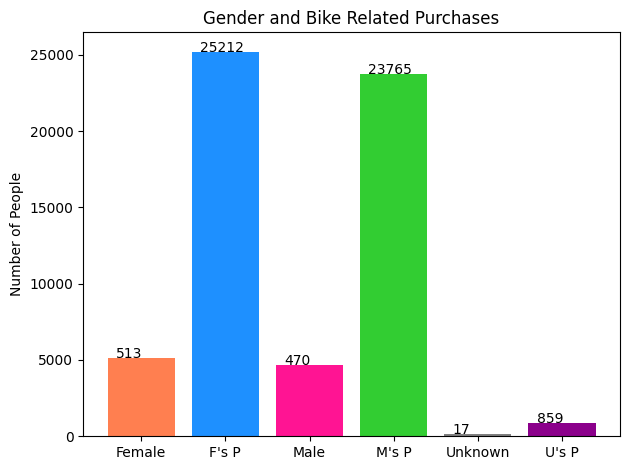

In [148]:
gender = [0, 0, 0]  # First is Female, second is Male, third is Unknown
bike = [0, 0, 0]  # Bike related purchases

# Count gender and bike purchases
for each in NewCustomerList['gender']:
    if each[0] == "F":
        gender[0] += 1
    elif each[0] == "M":
        gender[1] += 1
    else:
        gender[2] += 1

NewCustomerList[['past_3_years_bike_related_purchases']] = NewCustomerList[['past_3_years_bike_related_purchases']].apply(pd.to_numeric)
bike[0] += NewCustomerList['past_3_years_bike_related_purchases'][NewCustomerList['gender'] == 'Female'].sum()
bike[1] += NewCustomerList['past_3_years_bike_related_purchases'][NewCustomerList['gender'] == 'Male'].sum()
bike[2] += NewCustomerList['past_3_years_bike_related_purchases'][NewCustomerList['gender'] == 'U'].sum()

# Data for the plot
grapho = [gender[0], bike[0], gender[1], bike[1], gender[2], bike[2]]
graphl = [gender[0] * 10, bike[0], gender[1] * 10, bike[1], gender[2] * 10, bike[2]]
colorr = ['#FF7F50', '#1E90FF', '#FF1493', '#32CD32', '#808080', '#8B008B']

# Function for formatting y-axis labels
def gf(x, pos):
    return int(x)

# Create the plot
formatter = FuncFormatter(gf)
x = np.arange(6)
fig, ax = plt.subplots()
ax.set_ylabel('Number of People')
ax.yaxis.set_major_formatter(formatter)
plt.bar(x, graphl, color=colorr)

# Add data labels and annotations
for i in range(len(graphl)):
    plt.text(x=i-0.3, y=graphl[i]+0.1, s=grapho[i], size=10)

# Set x-axis labels
plt.xticks(x, ('Female', "F's P", 'Male', "M's P", 'Unknown', "U's P"))

# Set plot title and adjust layout
plt.title('Gender and Bike Related Purchases')
plt.tight_layout()

# Show the plot
plt.show()

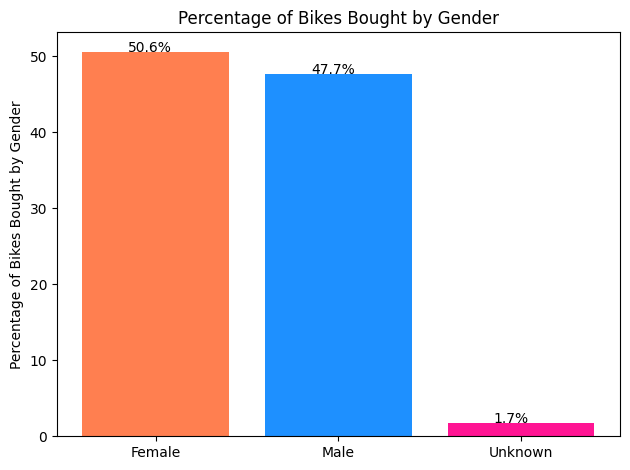

In [149]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate average percentage
avg = [0, 0, 0]
ss = sum(bike)
for i in range(len(avg)):
    avg[i] += round(bike[i] / ss * 100, 1)

# Create the plot
x1 = np.arange(3)
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Percentage of Bikes Bought by Gender')
plt.bar(x1, avg, color=colorr)

# Add data labels
for i in range(len(avg)):
    plt.text(x=i-0.15, y=avg[i], s=f'{avg[i]}%', size=10)

# Set x-axis labels
plt.xticks(x1, ('Female', 'Male', 'Unknown'))

# Set plot title and adjust layout
plt.title('Percentage of Bikes Bought by Gender')
plt.tight_layout()

# Show the plot
plt.show()

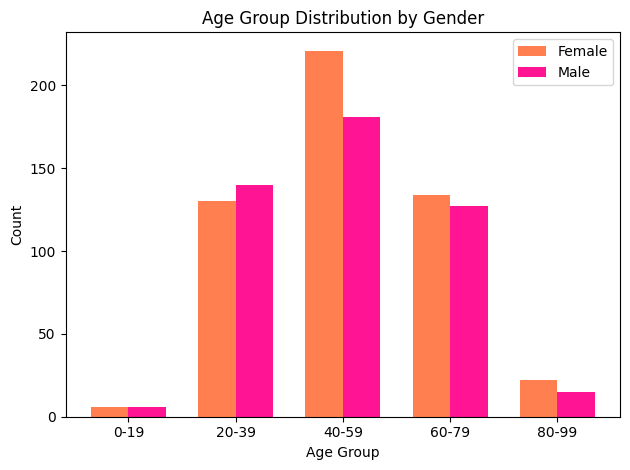

In [157]:
# Create the Age column in NewCustomerList with NaN values
NewCustomerList["Age"] = np.nan

# Calculate age and store in Age column
lenn = len(NewCustomerList['DOB'])
for i in range(1, lenn):
    dob = NewCustomerList['DOB'][i]
    if not pd.isnull(dob):
        if isinstance(dob, datetime.date):  # Type is date
            NewCustomerList["Age"][i] = 2020 - dob.year
        elif isinstance(dob, str):  # Type is string
            year = int(dob.split("-")[0])
            NewCustomerList["Age"][i] = 2020 - year

# Bin age values with a 20-year age gap for each gender
female_age_bins = np.arange(0, 110, 20)
male_age_bins = np.arange(0, 110, 20)

female_age_groups = pd.cut(NewCustomerList[NewCustomerList['gender'] == 'Female']["Age"], bins=female_age_bins, right=False)
male_age_groups = pd.cut(NewCustomerList[NewCustomerList['gender'] == 'Male']["Age"], bins=male_age_bins, right=False)

# Count age groups by gender
female_age_counts = female_age_groups.value_counts().sort_index()
male_age_counts = male_age_groups.value_counts().sort_index()

# Create the plot
fig, ax = plt.subplots()
x = np.arange(len(female_age_counts))
width = 0.35

rects1 = ax.bar(x - width/2, female_age_counts, width, label='Female', color=colorr[0])
rects2 = ax.bar(x + width/2, male_age_counts, width, label='Male', color=colorr[2])

# Set labels and title
ax.set_xlabel('Age Group')
ax.set_ylabel('Count')
ax.set_title('Age Group Distribution by Gender')

# Add legend
ax.legend()

# Set x-axis tick labels
age_group_labels = [f'{left}-{right-1}' for left, right in zip(female_age_bins[:-1], female_age_bins[1:])]
ax.set_xticks(x)
ax.set_xticklabels(age_group_labels)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


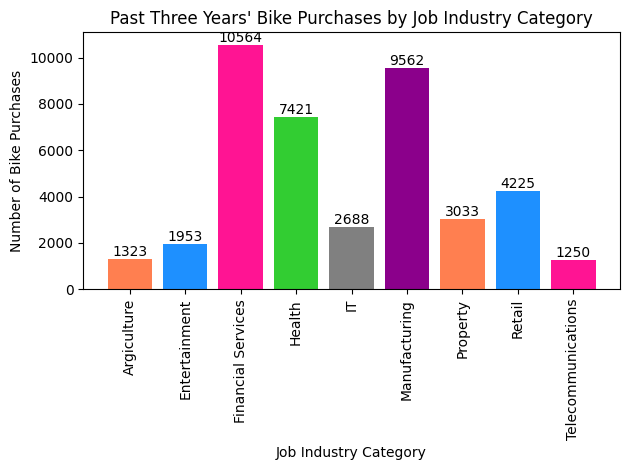

In [161]:
# Group the data by job industry category and calculate the sum of past three years' bike-related purchases
industry_purchases = NewCustomerList.groupby('job_industry_category')['past_3_years_bike_related_purchases'].sum()

# Get the industry categories and purchases as separate lists
categories = industry_purchases.index.tolist()
purchases = industry_purchases.values.tolist()

# Create the plot
fig, ax = plt.subplots()
x = np.arange(len(categories))
ax.bar(x, purchases, color=colorr)

# Set labels and title
ax.set_xlabel('Job Industry Category')
ax.set_ylabel('Number of Bike Purchases')
ax.set_title('Past Three Years\' Bike Purchases by Job Industry Category')

# Set x-axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=90)

# Add data labels to the bars
for i, value in enumerate(purchases):
    ax.text(i, value, str(value), ha='center', va='bottom')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

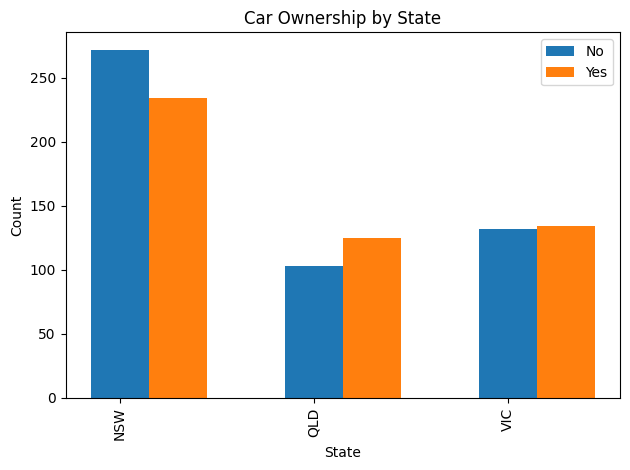

In [162]:
car_ownership = NewCustomerList.groupby(['state', 'owns_car']).size().unstack(fill_value=0)

# Get the states and car ownership labels
states = car_ownership.index.tolist()
car_labels = car_ownership.columns.tolist()

# Create the plot
fig, ax = plt.subplots()
x = range(len(states))
width = 0.3

# Plot the bars for each car ownership label
for i, label in enumerate(car_labels):
    ax.bar([val + width * i for val in x], car_ownership[label], width, label=label)

# Set labels and title
ax.set_xlabel('State')
ax.set_ylabel('Count')
ax.set_title('Car Ownership by State')
ax.set_xticks(x)
ax.set_xticklabels(states, rotation=90)

# Add a legend
ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# **FIN**